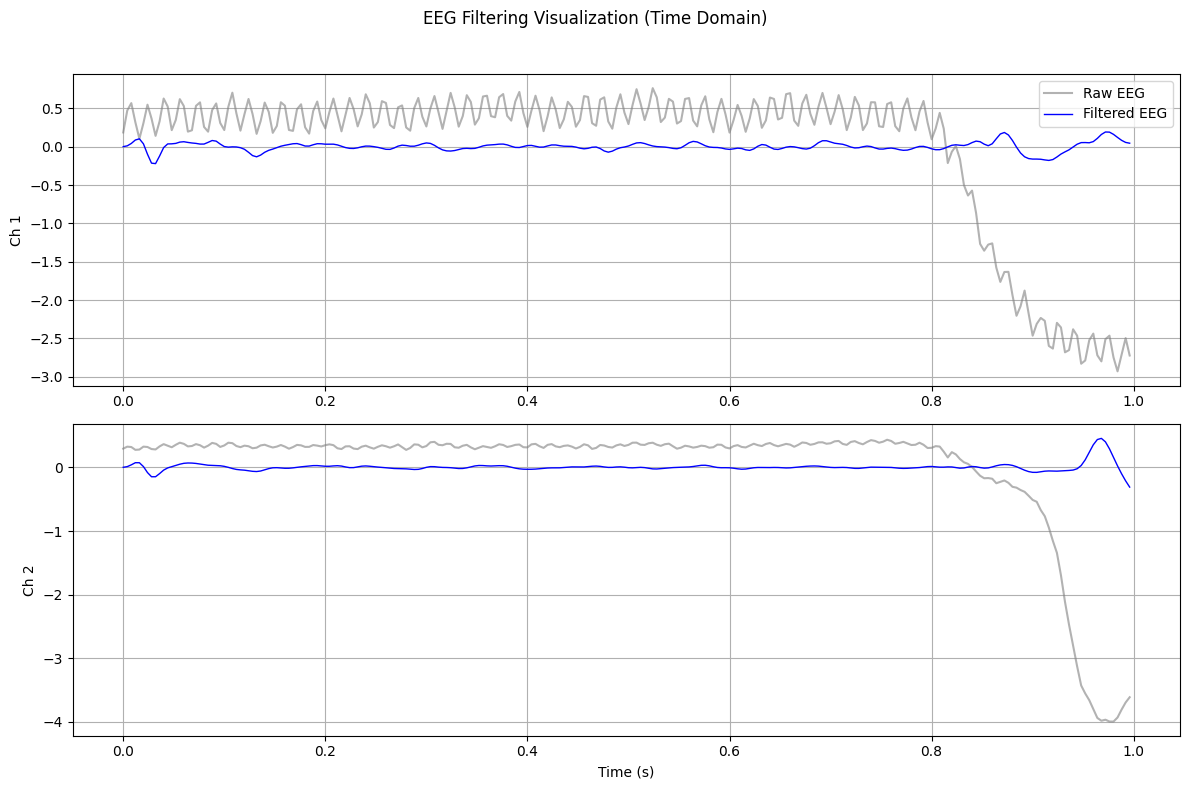

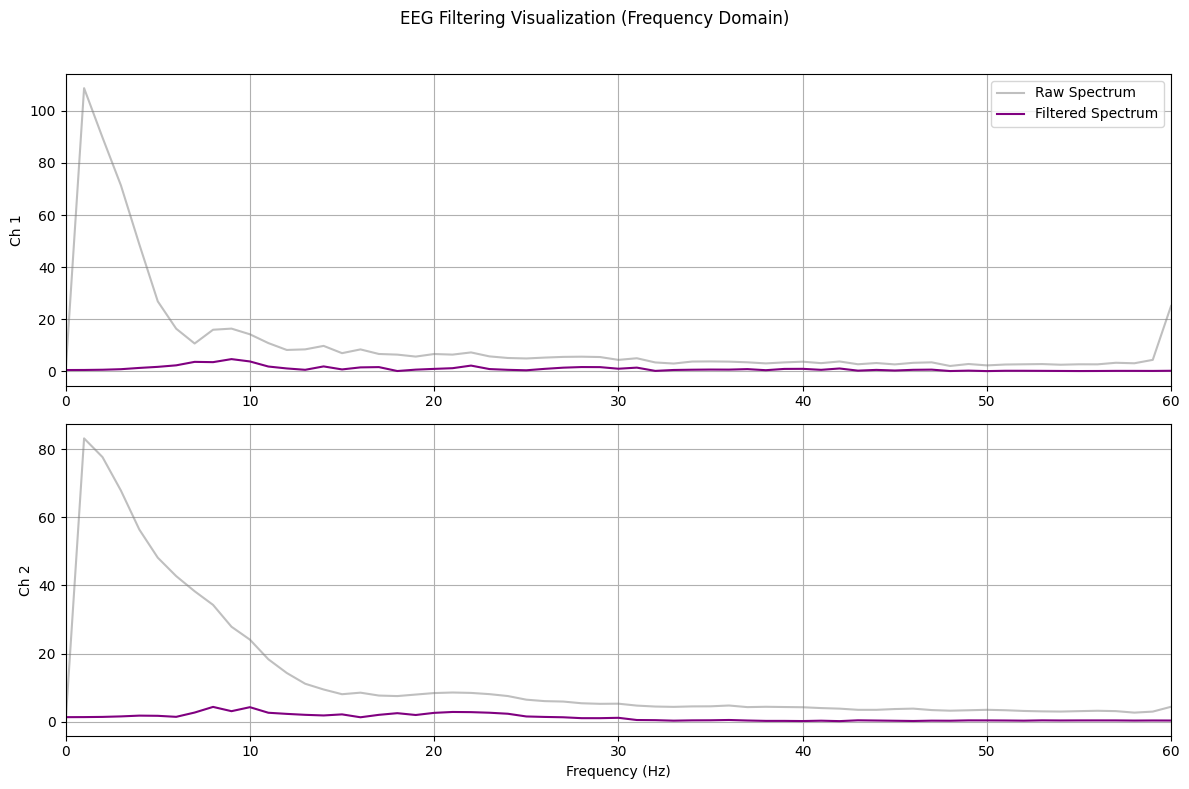

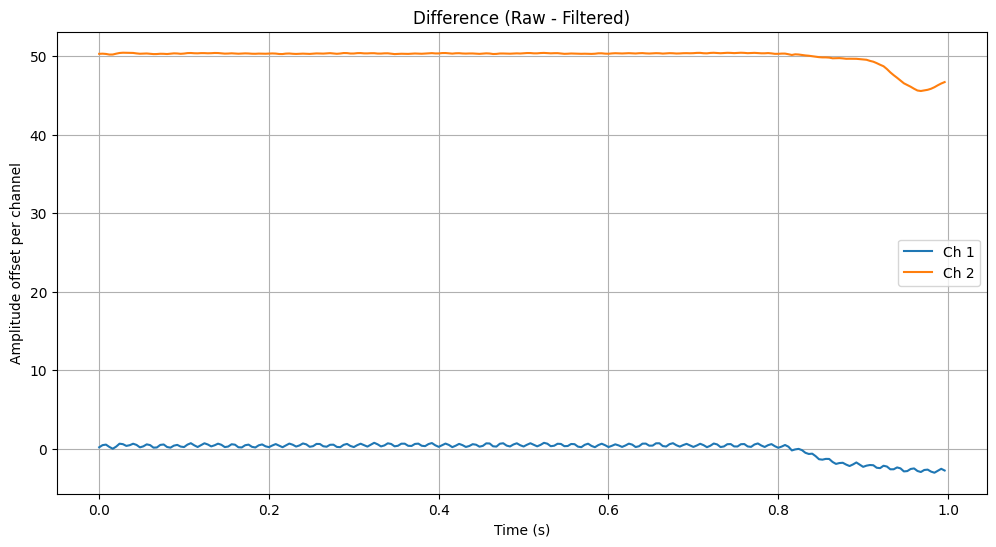

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functions import preprocess_raw_eeg
from scipy.fft import fft, fftfreq

# --- Load your raw EEG sample ---
# Replace this with your own npy file (4x250 or more)
raw_data = np.load(r"C:\Users\greym\Xavier\datasets\Grey\frontal\forward\1762239722681.npy")  # example path

fs = 250  # sampling rate (Hz)
n_channels, n_points = raw_data.shape
t = np.arange(n_points) / fs  # time vector (seconds)

# --- Run preprocessing from your pipeline ---
filtered_data, fft_data = preprocess_raw_eeg(
    data=raw_data.reshape(1, n_channels, n_points),  # shape = (samples, chans, points)
    fs=fs, lowcut=7, highcut=45, coi3order=0
)
filtered_data = filtered_data[0]  # remove batch dimension

# --- FFT for raw data (manual to compare) ---
freqs = fftfreq(n_points, 1 / fs)[: n_points // 2]
fft_raw = np.abs(fft(raw_data))[:, : n_points // 2]
fft_filtered = np.abs(fft(filtered_data))[:, : n_points // 2]

# =========================================
#        TIME-DOMAIN COMPARISON
# =========================================
plt.figure(figsize=(12, 8))
for ch in range(n_channels):
    plt.subplot(n_channels, 1, ch + 1)
    plt.plot(t, raw_data[ch], color="gray", alpha=0.6, label="Raw EEG")
    plt.plot(t, filtered_data[ch], color="blue", label="Filtered EEG", linewidth=1)
    plt.ylabel(f"Ch {ch+1}")
    plt.grid(True)
    if ch == 0:
        plt.legend(loc="upper right")
plt.xlabel("Time (s)")
plt.suptitle("EEG Filtering Visualization (Time Domain)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# =========================================
#        FREQUENCY-DOMAIN COMPARISON
# =========================================
plt.figure(figsize=(12, 8))
for ch in range(n_channels):
    plt.subplot(n_channels, 1, ch + 1)
    plt.plot(freqs, fft_raw[ch], color="gray", alpha=0.5, label="Raw Spectrum")
    plt.plot(freqs, fft_filtered[ch], color="purple", label="Filtered Spectrum")
    plt.xlim(0, 60)
    plt.ylabel(f"Ch {ch+1}")
    plt.grid(True)
    if ch == 0:
        plt.legend(loc="upper right")
plt.xlabel("Frequency (Hz)")
plt.suptitle("EEG Filtering Visualization (Frequency Domain)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# =========================================
#        DIFFERENCE TRACE (optional)
# =========================================
plt.figure(figsize=(12, 6))
for ch in range(n_channels):
    diff = raw_data[ch] - filtered_data[ch]
    plt.plot(t, diff + ch * 50, label=f"Ch {ch+1}")  # offset for clarity
plt.title("Difference (Raw - Filtered)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude offset per channel")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
raw_data = np.load(r"C:\Users\greym\Xavier\datasets\frontal\forward\1761246797705.npy")
print("Raw shape:", raw_data.shape)
for i, ch in enumerate(raw_data):
    print(f"Ch {i+1}: mean={np.mean(ch):.4f}, std={np.std(ch):.4f}, min={np.min(ch):.2f}, max={np.max(ch):.2f}")


In [ ]:
from brainflow import BoardShim, BoardIds
print(BoardShim.get_eeg_channels(BoardIds.CYTON_BOARD))


In [ ]:
data = board.get_current_board_data(250)
print(np.std(data, axis=1))
